# ConvNets or CNNs

Convolutional Neural Networks Best Practices<br>
**->Input Receptive Field Dimensions:** The default is 2D for images, but could be 1D
such as for words in a sentence or 3D for video that adds a time dimension.<br>
**->Receptive Field Size:** The patch should be as small as possible, but large enough to
see features in the input data. It is common to use 3 × 3 on small images and 5 × 5 or
7 × 7 and more on larger image sizes.<br>
**->Stride Width:** Use the default stride of 1. It is easy to understand and you don’t need
padding to handle the receptive field falling off the edge of your images. This could be
increased to 2 or larger for larger images.<br>
**->Number of Filters:** Filters are the feature detectors. Generally fewer filters are used at
the input layer and increasingly more filters used at deeper layers.<br>
**->Padding:** Set to zero and called zero padding when reading non-input data. This is
useful when you cannot or do not want to standardize input image sizes or when you want
to use receptive field and stride sizes that do not neatly divide up the input image size.<br>
**->Pooling:** Pooling is a destructive or generalization process to reduce overfitting. Receptive
field size is almost always set to 2 × 2 with a stride of 2 to discard 75% of the activations
from the output of the previous layer.<br>
**->Data Preparation:** Consider standardizing input data, both the dimensions of the
images and pixel values.<br>
**->Pattern Architecture:** It is common to pattern the layers in your network architecture.
This might be one, two or some number of convolutional layers followed by a pooling layer.
This structure can then be repeated one or more times. Finally, fully connected layers are
often only used at the output end and may be stacked one, two or more deep.<br>
**->Dropout:** CNNs have a habit of overfitting, even with pooling layers. Dropout should be
used such as between fully connected layers and perhaps after pooling layers.<br>

## Handwritten Digit Recognition

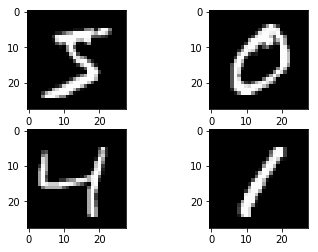

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap( 'gray' ))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' ))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' ))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' ))

plt.show()

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(X_train.shape);print(y_train.shape);print(X_test.shape);print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

seed = 7
numpy.random.seed(seed)

In [4]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [5]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer= 'normal' ,
    activation= 'relu' ))
    model.add(Dense(num_classes, kernel_initializer= 'normal' , activation= 'softmax' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

In [6]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200,verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/5
300/300 - 4s - loss: 0.2781 - accuracy: 0.9208 - val_loss: 0.1383 - val_accuracy: 0.9590
Epoch 2/5
300/300 - 3s - loss: 0.1101 - accuracy: 0.9677 - val_loss: 0.0969 - val_accuracy: 0.9712
Epoch 3/5
300/300 - 3s - loss: 0.0700 - accuracy: 0.9800 - val_loss: 0.0745 - val_accuracy: 0.9771
Epoch 4/5
300/300 - 3s - loss: 0.0494 - accuracy: 0.9856 - val_loss: 0.0694 - val_accuracy: 0.9771
Epoch 5/5
300/300 - 3s - loss: 0.0354 - accuracy: 0.9898 - val_loss: 0.0683 - val_accuracy: 0.9778
Baseline Error: 2.22%


# --------------------------------------------------------------------------------------------------------------

## Simple Convolutional Neural Network for MNIST

In [7]:
import numpy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras import backend as K
K.set_image_dim_ordering( 'th' )
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [8]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0],28, 28,1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype( 'float32' )
X_train.shape

(60000, 28, 28, 1)

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28,28,1), activation= 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' ))
    model.add(Dense(num_classes, activation= 'softmax' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

In [11]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 21s - loss: 0.2499 - accuracy: 0.9280 - val_loss: 0.0780 - val_accuracy: 0.9758
Epoch 2/10
300/300 - 21s - loss: 0.0753 - accuracy: 0.9783 - val_loss: 0.0504 - val_accuracy: 0.9839
Epoch 3/10
300/300 - 21s - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0511 - val_accuracy: 0.9830
Epoch 4/10
300/300 - 20s - loss: 0.0432 - accuracy: 0.9869 - val_loss: 0.0470 - val_accuracy: 0.9849
Epoch 5/10
300/300 - 20s - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.0375 - val_accuracy: 0.9874
Epoch 6/10
300/300 - 20s - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0390 - val_accuracy: 0.9864
Epoch 7/10
300/300 - 20s - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0390 - val_accuracy: 0.9873
Epoch 8/10
300/300 - 20s - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0360 - val_accuracy: 0.9889
Epoch 9/10
300/300 - 22s - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0350 - val_accuracy: 0.9894
Epoch 10/10
300/300 - 21s - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0353 - val_accura

In [12]:
# Larger CNN for the MNIST Dataset
import numpy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras import backend as K
K.set_image_dim_ordering( 'tf' )
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28,1), activation= 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation= 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' ))
    model.add(Dense(50, activation= 'relu' ))
    model.add(Dense(num_classes, activation= 'softmax' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 26s 85ms/step - loss: 0.3727 - accuracy: 0.8867 - val_loss: 0.0752 - val_accuracy: 0.9752
Epoch 2/10
300/300 [==============================] - 25s 85ms/step - loss: 0.0951 - accuracy: 0.9716 - val_loss: 0.0480 - val_accuracy: 0.9849
Epoch 3/10
300/300 [==============================] - 25s 85ms/step - loss: 0.0683 - accuracy: 0.9790 - val_loss: 0.0395 - val_accuracy: 0.9874
Epoch 4/10
300/300 [==============================] - 24s 80ms/step - loss: 0.0547 - accuracy: 0.9830 - val_loss: 0.0378 - val_accuracy: 0.9880
Epoch 5/10
300/300 [==============================] - 27s 90ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0308 - val_accuracy: 0.9897
Epoch 6/10
300/300 [==============================] - 26s 85ms/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0.0286 - val_accuracy: 0.9896
Epoch 7/10
300/300 [==============================] - 23s 77ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0277 - val_accuracy:

# ---------------------------------------------------------------------------------------------------------------

## Keras Image Augmentation API

Keras provides the ImageDataGenerator class that defines the configuration for image data preparation and
augmentation. This includes capabilities such as:
* Feature-wise standardization.
* ZCA whitening.
* Random rotation, shifts, shear and flips.
* Dimension reordering.
* Save augmented images to disk.

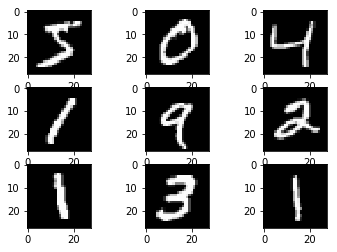

In [16]:
# Plot of images as baseline for comparison
from keras.datasets import mnist
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap( 'gray' ))
# show the plot
pyplot.show()

### Feature Standardization

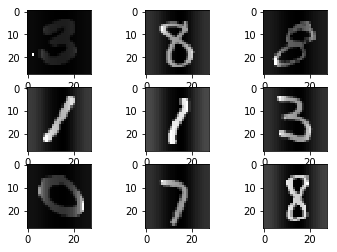

In [25]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering( 'tf' )
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype( 'float32' )
X_test = X_test.astype( 'float32' )
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
    # show the plot
    pyplot.show()
    break

### ZCA Whitening

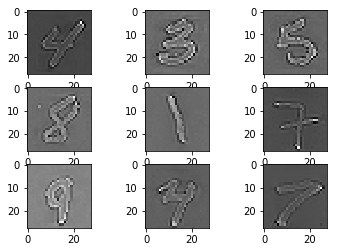

In [28]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering( 'tf' )
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype( 'float32' )
X_test = X_test.astype( 'float32' )
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
# create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
    # show the plot
    pyplot.show()
    break

### Random Rotations

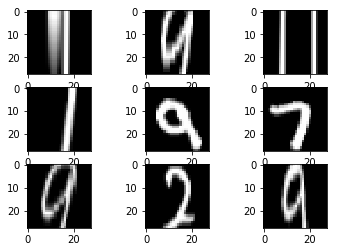

In [29]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering( 'tf' )
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype( 'float32' )
X_test = X_test.astype( 'float32' )
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
    # show the plot
    pyplot.show()
    break

### Random Shifts

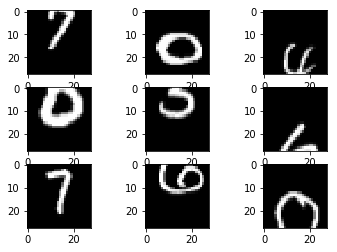

In [32]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering( 'tf' )
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype( 'float32' )
X_test = X_test.astype( 'float32' )
# define data preparation
shift = 0.5
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
    # show the plot
    pyplot.show()
    break

### Random Flips

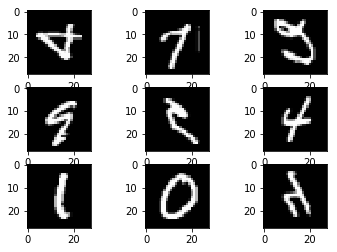

In [34]:
# Random Flips
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering( 'tf' )
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype( 'float32' )
X_test = X_test.astype( 'float32' )
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
    # show the plot
    pyplot.show()
    break

# ---------------------------------------------------------------------------------------------------------------

## Project Object Recognition in Photographs

#####  Loading The CIFAR-10 Dataset in Keras

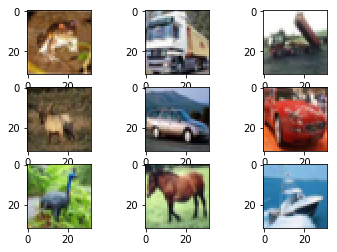

In [37]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
# from scipy.misc import toimage
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow((X_train[i]))
# show the plot
pyplot.show()

In [43]:
# Simple CNN model for CIFAR-10
import numpy
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras import backend as K
# K.set_image_dim_ordering( 'tf' )

seed = 2
numpy.random.seed(seed)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype( 'float32' )
X_test = X_test.astype( 'float32' )
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [50]:
model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=(32, 32,3),padding='same',activation='relu',kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3),activation= 'relu',padding= 'same' ,kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation= 'relu' , kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation= 'softmax' ))
# Compile model
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss= 'categorical_crossentropy' , optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)              

In [52]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
391/391 [==============================] - 137s 351ms/step - loss: 1.4096 - accuracy: 0.4911 - val_loss: 1.3829 - val_accuracy: 0.5079
Epoch 2/10
391/391 [==============================] - 131s 334ms/step - loss: 1.3296 - accuracy: 0.5227 - val_loss: 1.2556 - val_accuracy: 0.5561
Epoch 3/10
391/391 [==============================] - 130s 333ms/step - loss: 1.2729 - accuracy: 0.5440 - val_loss: 1.2174 - val_accuracy: 0.5675
Epoch 4/10
391/391 [==============================] - 131s 335ms/step - loss: 1.2285 - accuracy: 0.5594 - val_loss: 1.1926 - val_accuracy: 0.5821
Epoch 5/10
391/391 [==============================] - 130s 333ms/step - loss: 1.1882 - accuracy: 0.5765 - val_loss: 1.1593 - val_accuracy: 0.5901
Epoch 6/10
391/391 [==============================] - 133s 339ms/step - loss: 1.1545 - accuracy: 0.5901 - val_loss: 1.1312 - val_accuracy: 0.5987
Epoch 7/10
391/391 [==============================] - 139s 357ms/step - loss: 1.1177 - accuracy: 0.6035 - val_loss: 1.1246 -

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation= 'relu' , padding= 'same' ))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation= 'relu' , padding= 'same' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation= 'relu' , padding= 'same' ))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation= 'relu' , padding= 'same' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation= 'relu' , padding= 'same' ))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation= 'relu' , padding= 'same' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation= 'relu' , kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation= 'relu' , kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation= 'softmax' ))
# Compile model
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss= 'categorical_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Project: Predict Sentiment From Movie Reviews

In [54]:
import numpy
from tensorflow.keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [55]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [59]:
# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [61]:
# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


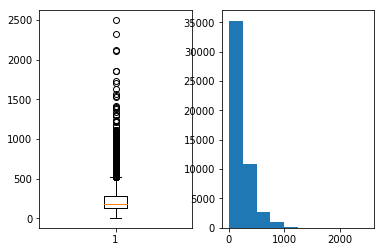

In [67]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length as a boxplot and histogram
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

In [69]:
# MLP for the IMDB problem
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [70]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [71]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [73]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_6 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 250)               4000250   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=128,verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/3
196/196 [==============================] - 17s 87ms/step - loss: 0.0894 - accuracy: 0.9703 - val_loss: 0.3557 - val_accuracy: 0.8700
Epoch 2/3
196/196 [==============================] - 17s 87ms/step - loss: 0.0241 - accuracy: 0.9946 - val_loss: 0.4517 - val_accuracy: 0.8665
Epoch 3/3
196/196 [==============================] - 18s 90ms/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 0.5476 - val_accuracy: 0.8651
Accuracy: 86.51%


### One-Dimensional Convolutional Neural Network

In [77]:
# CNN for the IMDB problem
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [78]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [79]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding= 'same' , activation= 'relu' ))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 250)               2000250   
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [82]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
196/196 - 18s - loss: 0.0819 - accuracy: 0.9749 - val_loss: 0.3781 - val_accuracy: 0.8748
Epoch 2/2
196/196 - 18s - loss: 0.0330 - accuracy: 0.9928 - val_loss: 0.4487 - val_accuracy: 0.8722
782/782 [==============================] - 6s 8ms/step - loss: 0.4487 - accuracy: 0.8722
Accuracy: 87.22%
